# Result Visualisation#
## Imports
We start by importing some modules we need

In [1]:
import torch
from PIL import Image
from torchvision import tv_tensors
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from datastorage.cocodataset import COCODataset
from transformers import AutoImageProcessor
import importlib
from transformers import( Mask2FormerForUniversalSegmentation, Mask2FormerImageProcessor)
from transformers.models.mask2former.configuration_mask2former import Mask2FormerConfig
import pytorch_lightning 
import evaluate
from models.mask2former import Mask2FormerFinetuner
from torch.utils.data import DataLoader
import numpy as np
import torch.nn.functional as F
from tqdm import tqdm
from torchmetrics.detection.mean_ap import MeanAveragePrecision
import configs.runconfig as runconfig

/home/ida01/tglobisch/micromamba/envs/benchmark/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ida01/tglobisch/micromamba/envs/benchmark/lib/python3.10/site-packages/lightning/fabric/__init__.py:41: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.


 ## Function Definition
Define Functions that we need for evaluation

In [ ]:
metric.reset()
size=(272, 490)
with torch.no_grad():
    testmodel.eval()
    for batch in tqdm(test_dataloader):
        output = testmodel.model(pixel_values=batch["pixel_values"].cuda())
        target_mask =  batch["original_segmentation_maps"]
        sizes = [i.shape for i in target_mask]
       
        res = processor.post_process_semantic_segmentation(output,target_sizes=sizes)
        result = torch.stack(res).cpu()   
       
        ignore_idx = 24
        ground_truth = list()
        for mask in target_mask:
            labels = []
            masks = []
            for label in np.unique(mask):
                if label == ignore_idx:
                    continue
                labels.append(label)
                res_msk = np.zeros(mask.shape)
                res_msk[mask==label] = 1
                masks.append(res_msk)
            ground_truth.append(
                dict(
                    masks=torch.tensor(np.stack(masks)).to(torch.bool),
                    scores=torch.ones(len(masks)),
                    labels = torch.tensor(labels).long()
                )
            )
        
        preds = list()
        for mask in result:
            labels = []
            masks = []
            for label in np.unique(mask):
                if label == ignore_idx:
                    continue
                labels.append(label)
                res_msk = np.zeros(mask.shape)
                res_msk[mask==label] = 1
                masks.append(res_msk)
            if masks:
                preds.append(
                    dict(
                        masks=torch.tensor(np.stack(masks)).to(torch.bool),
                        scores=torch.ones(len(masks)),
                        labels = torch.tensor(labels).long()
                    )
                )
            else: 
                preds.append(
                    dict(
                        masks=torch.zeros((0, target_mask[0].shape[-2], target_mask[0].shape[-1]), dtype=torch.bool) ,
                        scores=torch.ones(len(masks)),
                        labels = torch.tensor(labels).long()
                    )
                )
        metric.update(preds,ground_truth)        
metric.compute()





 58%|██████████████████████████████████████████████▋                                 | 14/24 [01:06<00:46,  4.61s/it]

In [88]:
model1 = Mask2FormerFinetuner.load_from_checkpoint("/home/ida01/tglobisch/checkpoints/cou/snowy-flower-326/epoch=43-step=2508.ckpt")

/home/ida01/tglobisch/micromamba/envs/benchmark/lib/python3.10/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of Mask2FormerForUniversalSegmentation were not initialized from the model checkpoint at facebook/mask2former-swin-large-ade-semantic and are newly initialized because the shapes did not match:
- class_predictor.bias: found shape torch.Size([151]) in the checkpoint and torch.Size([26]) in the model instantiated
- class_predictor.weight: found shape torch.Size([151, 256]) in the checkpoint and torch.Size([26, 256]) in the model instantiated
- criterion.empty_weight: found shape torch.Size([151]) in the checkpoint and torch.Size([26]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and in

Freezing encoder


In [89]:

with torch.no_grad():
    model1.eval()
    output = model1.model(pixel_values=testbatch.pixel_values.cuda())

In [52]:
for i in output:
    print(i)

class_queries_logits
masks_queries_logits
encoder_last_hidden_state
pixel_decoder_last_hidden_state
transformer_decoder_last_hidden_state


In [90]:
output.class_queries_logits.shape

torch.Size([1, 100, 26])

In [91]:
for i in output.class_queries_logits[0]:
    print(np.argmax(i.cpu()))

tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(17)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(24)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)
tensor(25)

In [92]:
target_mask =  testbatch["original_segmentation_maps"]
sizes = [i.shape for i in target_mask]

In [93]:
res = processor.post_process_semantic_segmentation(output,target_sizes=sizes)

In [70]:
len(testbatch.original_segmentation_maps[0])

1080

In [75]:
sizes

[(1080, 1920)]

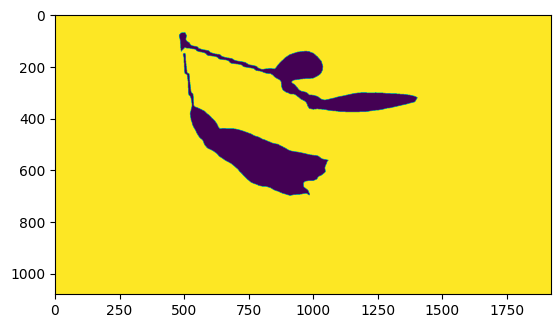

In [94]:
plt.imshow(res[0].cpu()) 

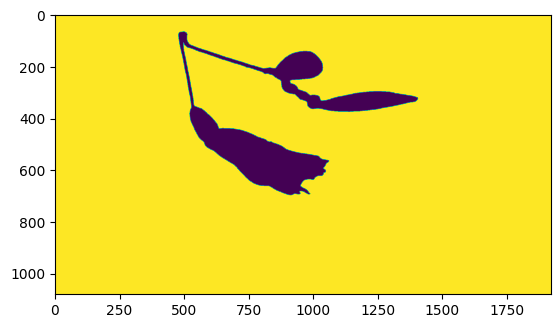

In [95]:
plt.imshow(testbatch.original_segmentation_maps[0])

In [2]:
t = np.array((0,100,100))


TypeError: array() takes from 1 to 2 positional arguments but 3 were given

In [12]:
t = np.empty((0,100,100))

In [13]:
t.shape

(0, 100, 100)

In [14]:
test = np.ones((100,100))

In [20]:
tutu = np.append(t,test[np.newaxis,:,:],axis=0)

In [23]:
tutu.shape

(2, 100, 100)

In [22]:
tutu = np.append(tutu,test[np.newaxis,:,:],axis=0)

In [26]:
tes = np.ones((3,10,10))

In [29]:
for i in tes:
    print(i.shape)

(10, 10)
(10, 10)
(10, 10)


In [31]:
test =np.array([[1,2,3,4],[1,1,1,1],[3,2,1,4]])

In [33]:
res = test == 1

In [36]:
 res.astype(np.int32)

array([[1, 0, 0, 0],
       [1, 1, 1, 1],
       [0, 0, 1, 0]], dtype=int32)